In [3]:
import matplotlib.pyplot as plt
from utils import utils
import cv2
import numpy as np

def boundbox_similar(mask, img_shape, max_var_percentage=0.1, size_mode="random"):    
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Get the bounding box of the first contour
    x, y, w, h = cv2.boundingRect(contours[0])
    #print(x, y, w, h)
    
    # Create the bounding box coordinates
    bbox = [x, y, x+w, y+h]
    max_var_x = (bbox[2] - bbox[0])*max_var_percentage
    max_var_y = (bbox[3] - bbox[1])*max_var_percentage
    
    ## Add random variation to the position of the bounding box's upper left corner
    #new_x = np.clip(x + np.random.randint(-max_var_x, max_var_x+1), 0, img_shape[1]-w)
    #new_y = np.clip(y + np.random.randint(-max_var_y, max_var_y+1), 0, img_shape[0]-h)
    new_x = np.clip(x + max_var_x+1, 0, img_shape[1]-w)
    new_y = np.clip(y +max_var_y+1, 0, img_shape[0]-h)
    
    # Calculate the size variation based on the size_mode parameter
    if size_mode == "bigger":
        size_var_x =  (max_var_x+1)
        size_var_y = (max_var_y+1)
    elif size_mode == "smaller":
        size_var_x = np.random.randint(-max_var_x, 1)
        size_var_y = np.random.randint(-max_var_y, 1)
    else:  # Default to "random" if an unsupported mode is provided
        size_var_x = np.random.randint(-max_var_x, max_var_x+1)
        size_var_y = np.random.randint(-max_var_y, max_var_y+1)
    
    # Calculate the new width and height with the size variation
    new_w = np.clip(w + size_var_x, 1, img_shape[1] - new_x)
    new_h = np.clip(h + size_var_y, 1, img_shape[0] - new_y)
    
    # Create the similar_bbox coordinates
    similar_bbox = [new_x, new_y, new_x + new_w, new_y + new_h]
    
    return np.array(bbox), np.array(similar_bbox)

# BBox Similar Max variations in both size and position

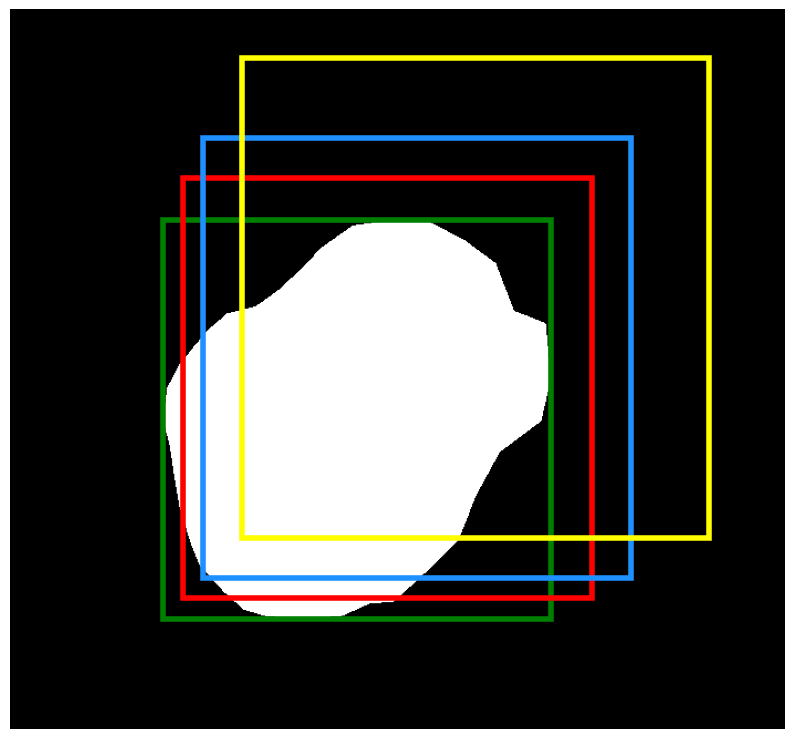

In [14]:

binary_mask = cv2.imread('/mnt/B-SSD/maltamed/datasets/2D/ISIC/mask/ISIC_0000102_segmentation.png', cv2.IMREAD_GRAYSCALE)
bbox_original, bbox_similar_05 = boundbox_similar(binary_mask, binary_mask.shape, max_var_percentage=0.05, size_mode="bigger")
bbox_original, bbox_similar_10 = boundbox_similar(binary_mask, binary_mask.shape, max_var_percentage=0.1, size_mode="bigger")
bbox_original, bbox_similar_20 = boundbox_similar(binary_mask, binary_mask.shape, max_var_percentage=0.2, size_mode="bigger")
plt.figure(figsize=(10, 10))
plt.imshow(binary_mask, cmap='gray')
utils.show_box(bbox_original, plt.gca(), color='green')
utils.show_box(bbox_similar_05, plt.gca(), color='red')
utils.show_box(bbox_similar_10, plt.gca(), color='dodgerblue')
utils.show_box(bbox_similar_20, plt.gca(), color='yellow')
plt.xlim(700, 1400)
plt.ylim(500, 1150)
plt.axis('off')
#plt.legend(['Original', 'Similar 5%', 'Similar 10%', 'Similar 20%'])
#save with 300dpi
plt.savefig('images/bbox_similar.png', dpi=300, bbox_inches='tight')
plt.show()

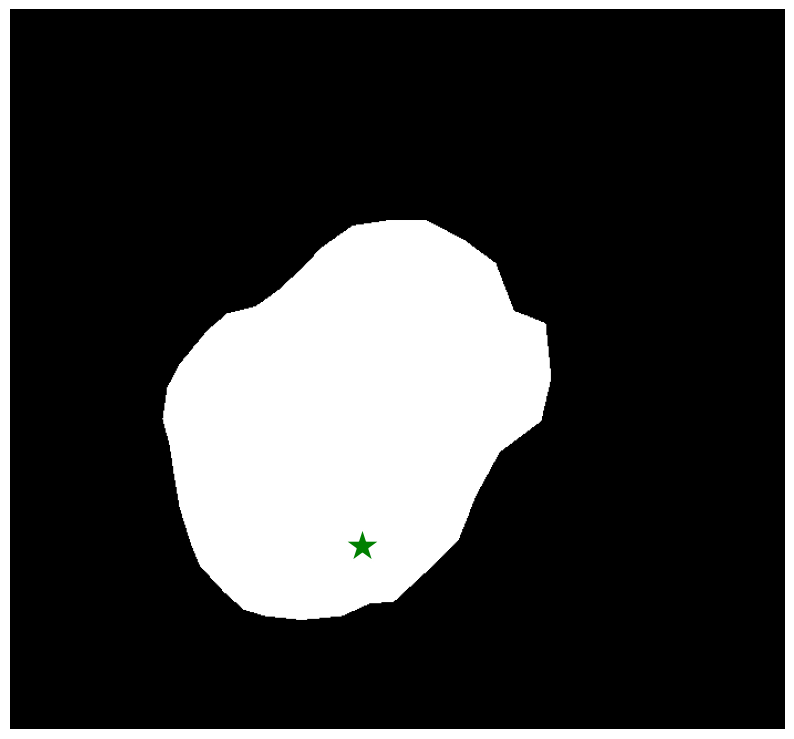

In [8]:
binary_mask = cv2.imread('/mnt/B-SSD/maltamed/datasets/2D/ISIC/mask/ISIC_0000102_segmentation.png', cv2.IMREAD_GRAYSCALE)
input_coordinate, labels = utils.random_coordinate(binary_mask)

plt.figure(figsize=(10,10))
plt.imshow(binary_mask, cmap='gray')
utils.show_points(input_coordinate, labels, plt.gca())
plt.xlim(700, 1400)
plt.ylim(500, 1150)
plt.axis('off')
#save with 300dpi
plt.savefig('images/random_point.png', dpi=300, bbox_inches='tight')
plt.show()

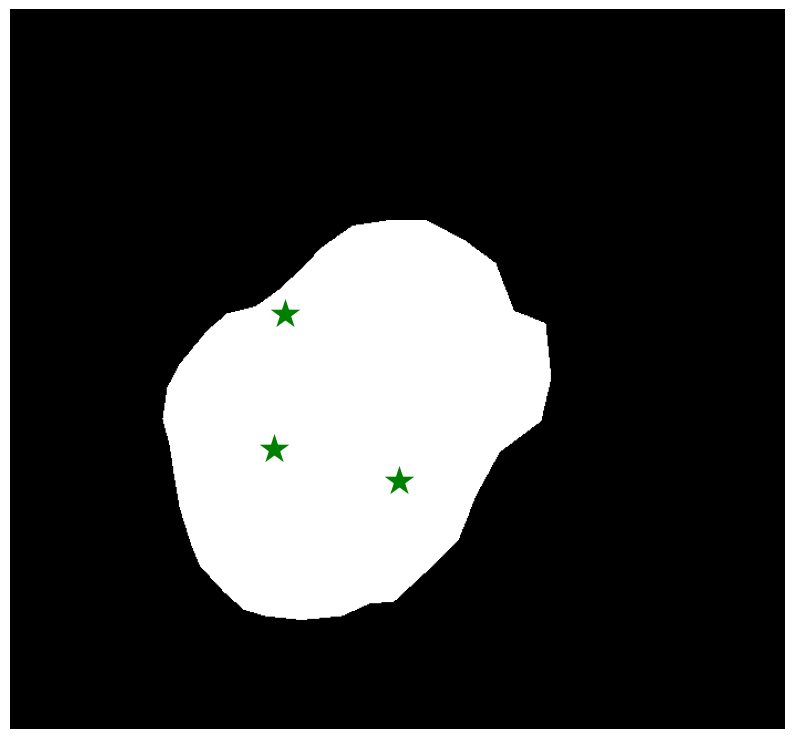

In [9]:
binary_mask = cv2.imread('/mnt/B-SSD/maltamed/datasets/2D/ISIC/mask/ISIC_0000102_segmentation.png', cv2.IMREAD_GRAYSCALE)
input_rs3, input_label_rs3 = utils.random_splits(binary_mask, n_splits=3)

plt.figure(figsize=(10,10))
plt.imshow(binary_mask, cmap='gray')
utils.show_points(input_rs3, input_label_rs3, plt.gca())
plt.xlim(700, 1400)
plt.ylim(500, 1150)
plt.axis('off')
#save with 300dpi
plt.savefig('images/random_points_3.png', dpi=300, bbox_inches='tight')
plt.show()

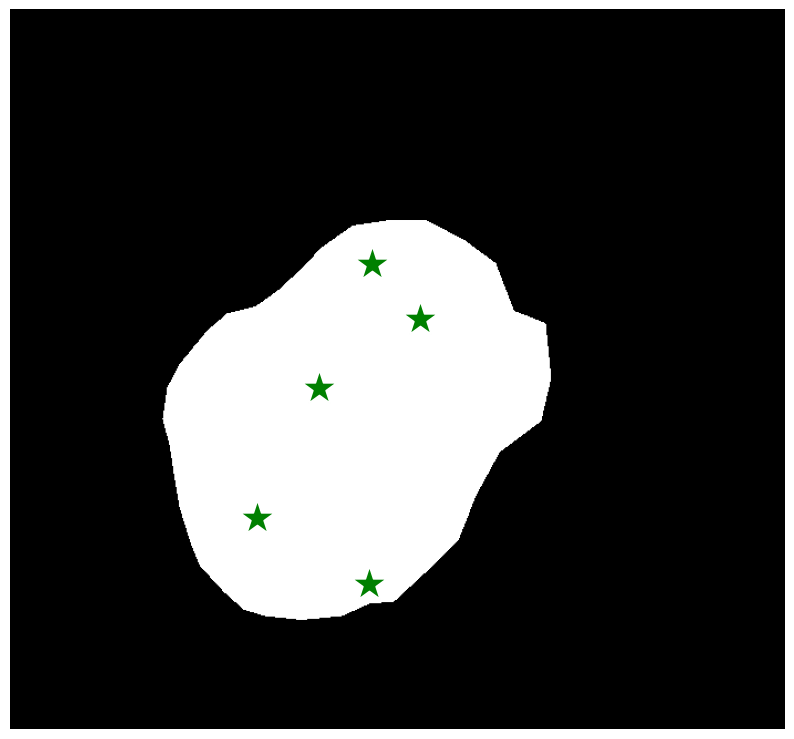

In [11]:
binary_mask = cv2.imread('/mnt/B-SSD/maltamed/datasets/2D/ISIC/mask/ISIC_0000102_segmentation.png', cv2.IMREAD_GRAYSCALE)
input_rs5, input_label_rs5 = utils.random_splits(binary_mask, n_splits=5)

plt.figure(figsize=(10,10))
plt.imshow(binary_mask, cmap='gray')
utils.show_points(input_rs5, input_label_rs5, plt.gca())
plt.xlim(700, 1400)
plt.ylim(500, 1150)
plt.axis('off')
#save with 300dpi
plt.savefig('images/random_points_5.png', dpi=300, bbox_inches='tight')
plt.show()

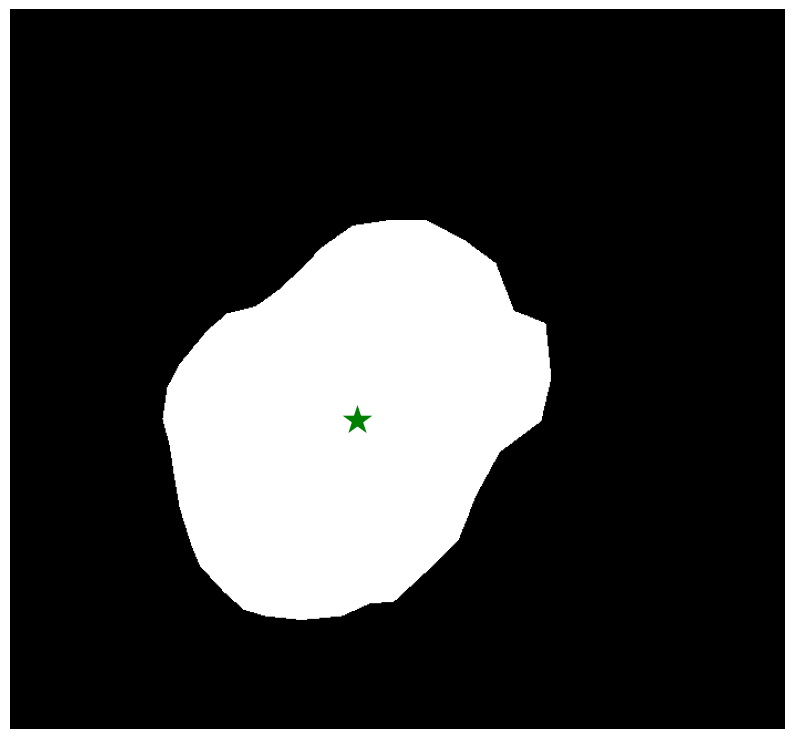

In [12]:
binary_mask = cv2.imread('/mnt/B-SSD/maltamed/datasets/2D/ISIC/mask/ISIC_0000102_segmentation.png', cv2.IMREAD_GRAYSCALE)
input_cp, input_label_cp = utils.central_point(binary_mask)

plt.figure(figsize=(10,10))
plt.imshow(binary_mask, cmap='gray')
utils.show_points(input_cp, input_label_cp, plt.gca())
plt.xlim(700, 1400)
plt.ylim(500, 1150)
plt.axis('off')
#save with 300dpi
plt.savefig('images/central_point.png', dpi=300, bbox_inches='tight')
plt.show()

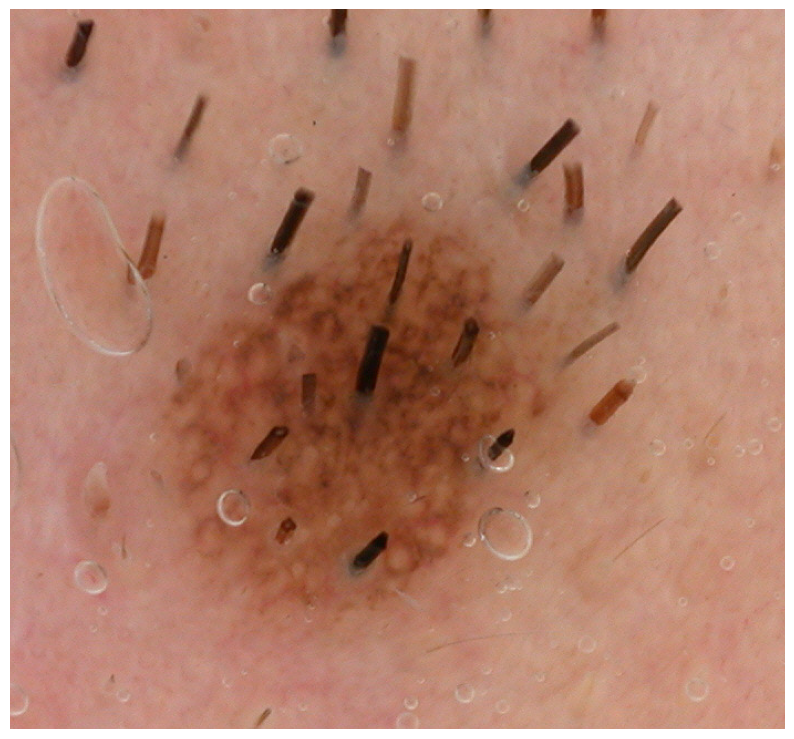

In [21]:
from matplotlib import image as mpimg
binary_mask = mpimg.imread('/mnt/B-SSD/maltamed/datasets/2D/ISIC/images/ISIC_0000102.jpg') 

plt.figure(figsize=(10,10))
plt.imshow(binary_mask)
plt.xlim(700, 1400)
plt.ylim(500, 1150)
plt.axis('off')
#save with 300dpi
plt.savefig('images/original.png', dpi=300, bbox_inches='tight')
plt.show()

## Juntando

In [15]:
from PIL import Image, ImageDraw, ImageFont

# Set the size of the final plot and the size of each grid cell
plot_width = 1800  # 6 inches at 300dpi
plot_height = 1200  # 9 inches at 300dpi
cell_width = 600
cell_height = 600

image_list = [
    '/mnt/B-SSD/maltamed/SAM-zero-shot/code/images/original.png', #ISIC
    '/mnt/B-SSD/maltamed/SAM-zero-shot/code/images/central_point.png', #HAM10000,
    '/mnt/B-SSD/maltamed/SAM-zero-shot/code/images/random_point.png', #Montgomery-Shenzhen
    '/mnt/B-SSD/maltamed/SAM-zero-shot/code/images/random_points_3.png', #hip
    '/mnt/B-SSD/maltamed/SAM-zero-shot/code/images/random_points_5.png', #CVC-ClinicDB
    '/mnt/B-SSD/maltamed/SAM-zero-shot/code/images/bbox_similar.png', #Breast Ultrasound Dataset
]

# Define the font and size of the letters to add
font = ImageFont.truetype('utils/arial.ttf', size=60)  # replace with your desired font and size

# Create a new blank image with the desired size and white background
plot = Image.new(mode='RGB', size=(plot_width, plot_height), color=(255, 255, 255))

# Open each image and paste it into the plot at the desired position, with a letter added
positions = [(0, 0), (cell_width, 0), (cell_width*2, 0), (0, cell_height), (cell_width, cell_height), (cell_width*2, cell_height)]
letters = ['A', 'B', 'C', 'D', 'E', 'F']  # add more letters if needed
for i in range(6):
    img = Image.open(image_list[i])  # replace with your actual image file names
    img = img.resize((cell_width, cell_height))  # resize the image to fit the grid cell
    plot.paste(img, box=positions[i])
    draw = ImageDraw.Draw(plot)
    draw.text((positions[i][0]+10, positions[i][1]+10), letters[i], font=font, fill=(255, 255, 255))

# Save the final plot with a high resolution
plot.save("images/prompts.png", dpi=(300, 300))


# Dataset Images

In [27]:
from PIL import Image, ImageDraw, ImageFont

# Set the size of the final plot and the size of each grid cell
plot_width = 1800  # 6 inches at 300dpi
plot_height = 1200  # 9 inches at 300dpi
cell_width = 600
cell_height = 600

image_list = [
    '/mnt/B-SSD/maltamed/datasets/2D/ISIC/images/ISIC_0016003.jpg', #ISIC
    '/mnt/B-SSD/maltamed/datasets/2D/HAM10000/images/ISIC_0031593.jpg', #HAM10000,
    '/mnt/B-SSD/maltamed/datasets/2D/CXR_kaggle/images/CHNCXR_0593_1.png', #Montgomery-Shenzhen
    '/mnt/B-SSD/maltamed/datasets/2D/hip/images/image_007.nii.png', #hip
    '/mnt/B-SSD/maltamed/datasets/2D/CVC/images/400.png', #CVC-ClinicDB
    '/mnt/B-SSD/maltamed/datasets/2D/mamo_US/images/malignant_(135).png', #Breast Ultrasound Dataset
]

# Define the font and size of the letters to add
font = ImageFont.truetype('utils/arial.ttf', size=60)  # replace with your desired font and size

# Create a new blank image with the desired size and white background
plot = Image.new(mode='RGB', size=(plot_width, plot_height), color=(255, 255, 255))

# Open each image and paste it into the plot at the desired position, with a letter added
positions = [(0, 0), (cell_width, 0), (cell_width*2, 0), (0, cell_height), (cell_width, cell_height), (cell_width*2, cell_height)]
letters = ['A', 'B', 'C', 'D', 'E', 'F']  # add more letters if needed
for i in range(6):
    img = Image.open(image_list[i])  # replace with your actual image file names
    img = img.resize((cell_width, cell_height))  # resize the image to fit the grid cell
    plot.paste(img, box=positions[i])
    draw = ImageDraw.Draw(plot)
    draw.text((positions[i][0]+10, positions[i][1]+10), letters[i], font=font, fill=(255, 255, 255))

# Save the final plot with a high resolution
plot.save("images/datasets.png", dpi=(300, 300))


# Figura das três predições

In [47]:
def plot_masks(image_loc, masks, name, dataset):
    # Create a figure with three subplots
    fig, axs = plt.subplots(1, 3, figsize=(16, 6), constrained_layout=True)

    # Loop through the images and plot them in each subplot
    for i in range(3):
        # Load the image and convert it to RGB
        image = cv2.imread(image_loc, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        axs[i].imshow(image)
        
        mask = masks[i]
        color = np.array([30/255, 144/255, 255/255, 0.6])
        h, w = mask.shape[-2:]
        mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
        axs[i].imshow(mask_image)
        axs[i].axis('off')

    # Save the figure without the large white background
    plt.savefig(f'images/mask/{dataset}_{name}.png', dpi=300, bbox_inches='tight')

cuda:0


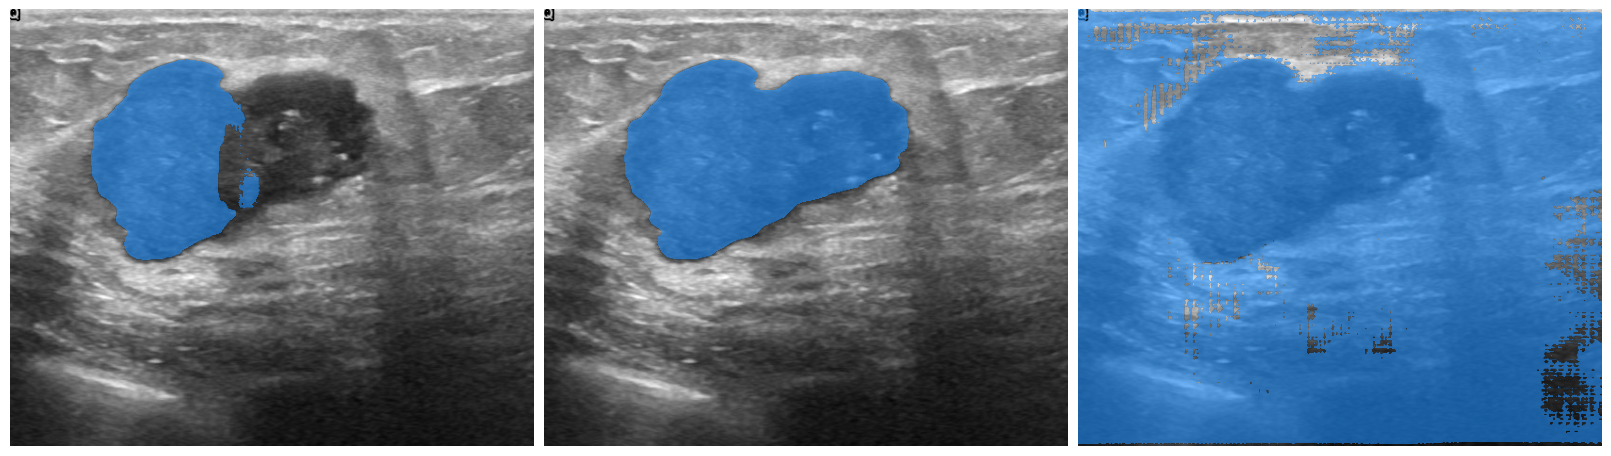

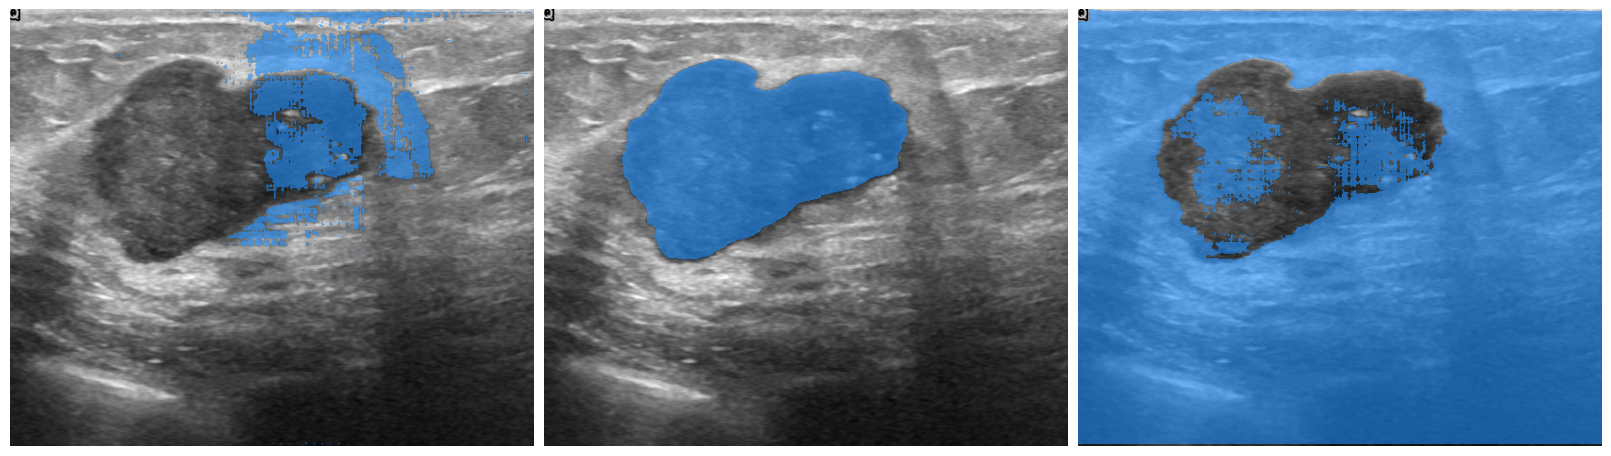

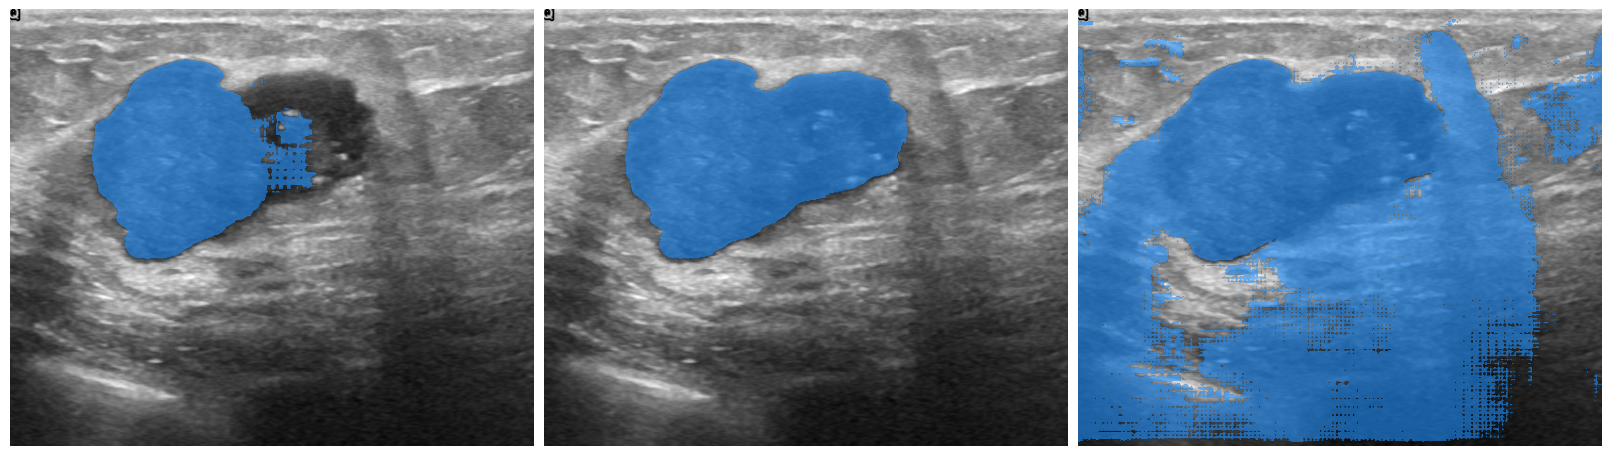

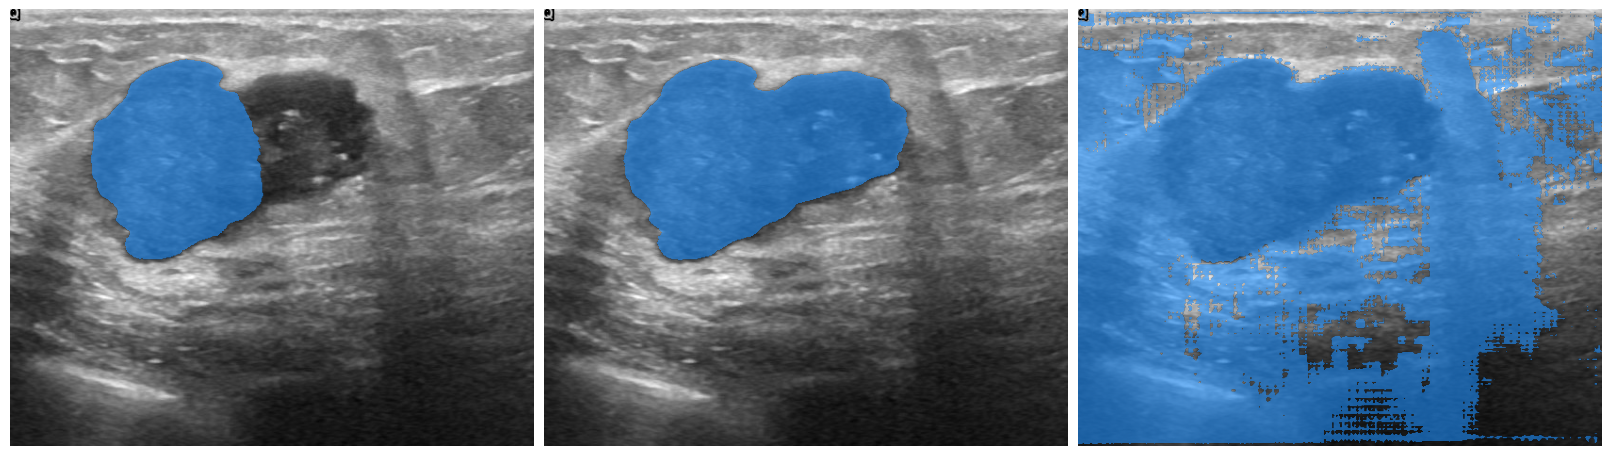

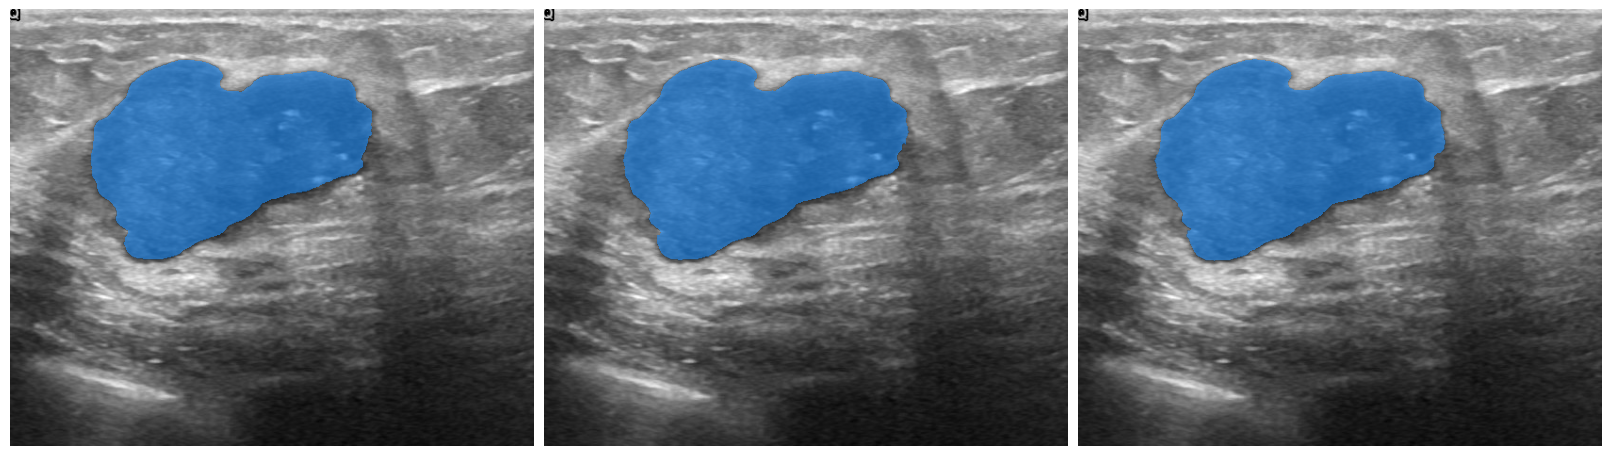

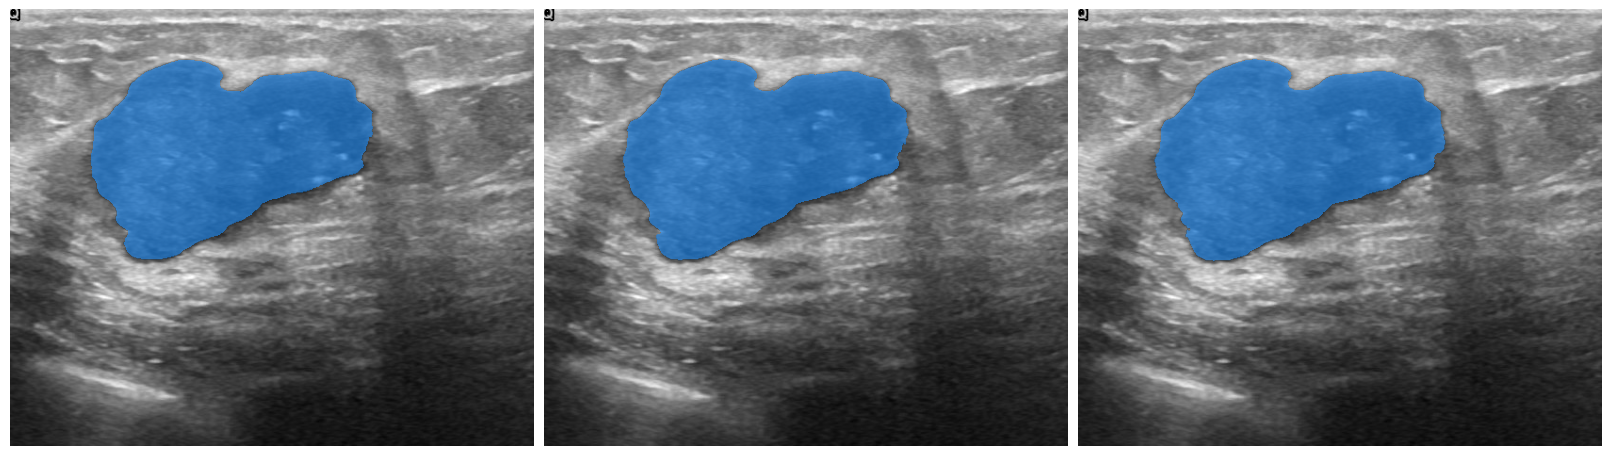

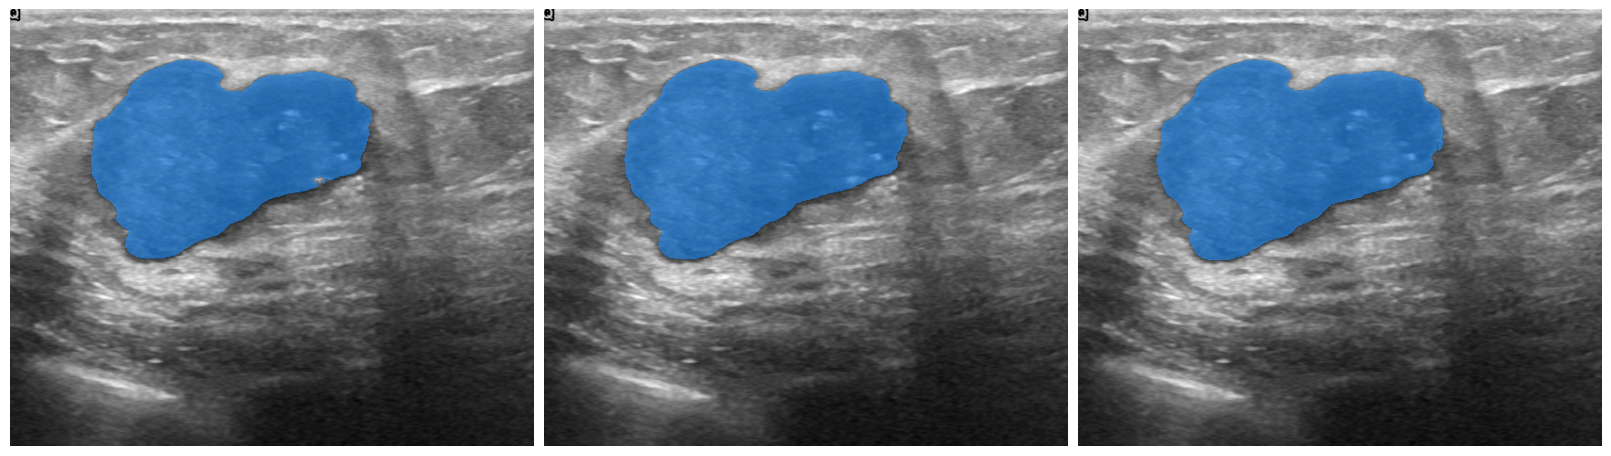

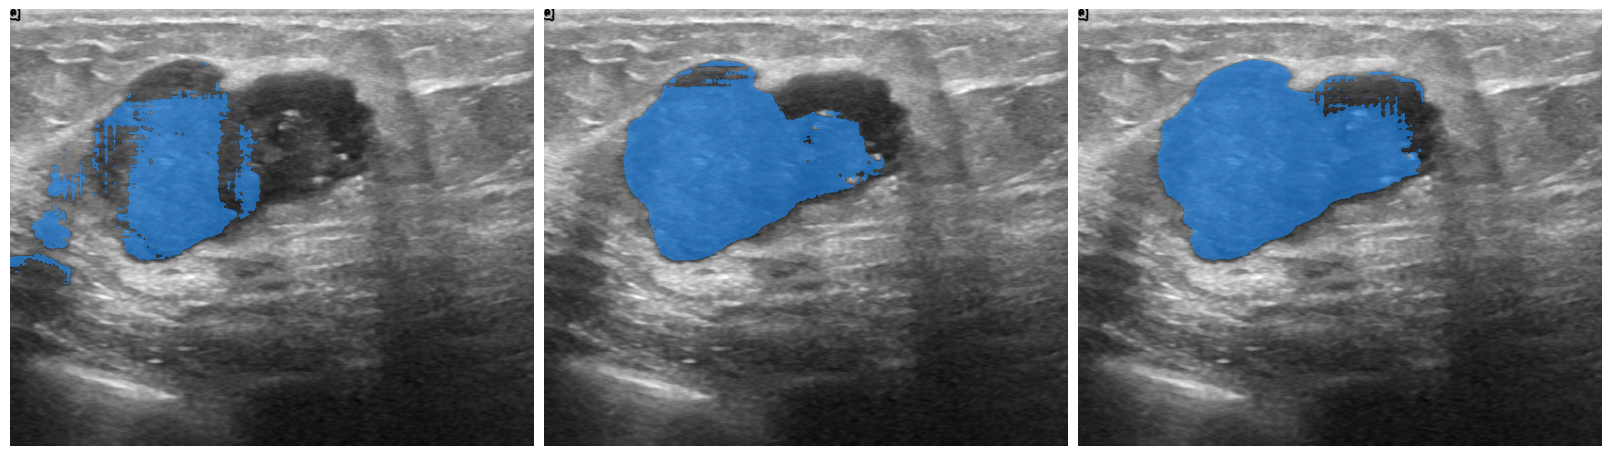

In [53]:
import cv2
import json
import torch

import matplotlib.pyplot as plt
import cv2
import numpy as np

from utils import utils
from segment_anything import sam_model_registry, SamPredictor

dicts = json.load(open('./utils/dicts.json', 'r'))

sam_checkpoint = dicts['sam_checkpoint']['default']
device = torch.device(f'cuda:{0}')
print(device)
model_type = 'default'
#change "-" to "_" to get the model name
model_type = model_type.replace("-", "_")
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

images = {
    'CVC': '/mnt/B-SSD/maltamed/datasets/2D/CVC/images/219.png',
    'CXR_kaggle': '/mnt/B-SSD/maltamed/datasets/2D/CXR_kaggle/images/CHNCXR_0170_0.png',
    'HAM10000': '/mnt/B-SSD/maltamed/datasets/2D/HAM10000/images/ISIC_0024320.jpg',
    'hip': '/mnt/B-SSD/maltamed/datasets/2D/hip/images/image_007.nii.png',
    'ISIC': '/mnt/B-SSD/maltamed/datasets/2D/ISIC/images/ISIC_0000043.jpg',
    'mamo_US': '/mnt/B-SSD/maltamed/datasets/2D/mamo_US/images/malignant_(154).png',
}
mask =  {
    'CVC': '/mnt/B-SSD/maltamed/datasets/2D/CVC/mask/219.png',
    'CXR_kaggle': '/mnt/B-SSD/maltamed/datasets/2D/CXR_kaggle/mask/CHNCXR_0170_0_mask.png',
    'HAM10000': '/mnt/B-SSD/maltamed/datasets/2D/HAM10000/mask/ISIC_0024320_segmentation.png',
    'hip': '/mnt/B-SSD/maltamed/datasets/2D/hip/mask/label_007.png',
    'ISIC': '/mnt/B-SSD/maltamed/datasets/2D/ISIC/mask/ISIC_0000043_segmentation.png',
    'mamo_US': '/mnt/B-SSD/maltamed/datasets/2D/mamo_US/mask/malignant_(154).png',
}
erode = {
    'CVC': 1,
    'CXR_kaggle': 30,
    'HAM10000': 10,
    'hip': 10,
    'ISIC': 30,
    'mamo_US': 10,
}

dataset = 'mamo_US'
erode = erode[dataset]
image_loc = images[dataset]
mask_loc = mask[dataset]

#reading images and mask
image = cv2.imread(image_loc, cv2.IMREAD_COLOR)
mask = cv2.imread(mask_loc, cv2.IMREAD_GRAYSCALE)

# #turn all masks to 1
# mask[mask>0] = 1

#FILL HOLES on mask
if dataset == 'ISIC':
    contour,hier = cv2.findContours(mask,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contour:
        cv2.drawContours(mask,[cnt],0,255,-1)
        
#split mask
masks_split = utils.split_mask(mask, dataset)

if dataset == "CXRkaggle" and len(masks_split) !=2:
    print(f"only 1 lung mask found in image: {image_loc}")
    
#create lists and set image
masks_rc, masks_rs3, masks_rs5, masks_cp, masks_bb, masks_bbs_05, masks_bbs_1, masks_bbs_2 = [], [], [], [], [], [], [], []

predictor.set_image(image)

for mask_s in masks_split:
    #get points and boxes
    input_rc, input_label_rc = utils.random_coordinate(mask_s, erode)
    input_rs3, input_label_rs3 = utils.random_splits(mask_s, n_splits=3, erode=erode)
    input_rs5, input_label_rs5 = utils.random_splits(mask_s, n_splits=5, erode=erode)
    input_cp, input_label_cp = utils.central_point(mask_s)
    input_bb, input_bbs_05 = utils.boundbox_similar(mask_s, mask_s.shape, max_var_percentage=0.05)
    _, input_bbs_1 = utils.boundbox_similar(mask_s, mask_s.shape, max_var_percentage=0.1)
    _, input_bbs_2 = utils.boundbox_similar(mask_s, mask_s.shape, max_var_percentage=0.2)

    #predict masks from points and boxes
    masks_rc_temp, scores_rc, logits_rc = predictor.predict(point_coords=input_rc, point_labels=input_label_rc,multimask_output=True)
    masks_rs3_temp, scores_rs3, logits_rs3 = predictor.predict(point_coords=input_rs3, point_labels=input_label_rs3,multimask_output=True)
    masks_rs5_temp, scores_rs5, logits_rs5 = predictor.predict(point_coords=input_rs5, point_labels=input_label_rs5,multimask_output=True)
    masks_cp_temp, scores_cp, logits_cp = predictor.predict(point_coords=input_cp, point_labels=input_label_cp,multimask_output=True)
    masks_bb_temp, scores_bb, logits_bb = predictor.predict(point_coords=None, point_labels=None, box=input_bb, multimask_output=True)
    masks_bbs_05_temp, scores_bbs_05, logits_bbs_05 = predictor.predict(point_coords=None, point_labels=None, box=input_bbs_05, multimask_output=True)
    masks_bbs_1_temp, scores_bbs_1, logits_bbs_1 = predictor.predict(point_coords=None, point_labels=None, box=input_bbs_1, multimask_output=True)
    masks_bbs_2_temp, scores_bbs_2, logits_bbs_2 = predictor.predict(point_coords=None, point_labels=None, box=input_bbs_2, multimask_output=True)
    
    #append masks
    masks_rc.append(masks_rc_temp)
    masks_rs3.append(masks_rs3_temp)
    masks_rs5.append(masks_rs5_temp)
    masks_cp.append(masks_cp_temp)
    masks_bb.append(masks_bb_temp)
    masks_bbs_05.append(masks_bbs_05_temp)
    masks_bbs_1.append(masks_bbs_1_temp)
    masks_bbs_2.append(masks_bbs_2_temp)
        
#lista (5 elementos) de listas (2 elementos) de listas de 3 predições de máscara
mask_list = [masks_rc, masks_rs3, masks_rs5, masks_cp, masks_bb, masks_bbs_05, masks_bbs_1, masks_bbs_2]
masks_rc, masks_rs3, masks_rs5, masks_cp, masks_bb, masks_bbs_05, masks_bbs_1, masks_bbs_2 = utils.merge_masks(mask_list)

plot_masks(image_loc, masks_rc, 'masks_rc', dataset)
plot_masks(image_loc, masks_rs3, 'masks_rs3', dataset)
plot_masks(image_loc, masks_rs5, 'masks_rs5', dataset)
plot_masks(image_loc, masks_cp, 'masks_cp', dataset)
plot_masks(image_loc, masks_bb, 'masks_bb', dataset)
plot_masks(image_loc, masks_bbs_05, 'masks_bbs_05', dataset)
plot_masks(image_loc, masks_bbs_1, 'masks_bbs_1', dataset)
plot_masks(image_loc, masks_bbs_2, 'masks_bbs_2', dataset)

# Models Size

In [2]:
import cv2
import json
import torch

import matplotlib.pyplot as plt
import cv2
import numpy as np

from utils import utils
from segment_anything import sam_model_registry, SamPredictor

dicts = json.load(open('./utils/dicts.json', 'r'))

sam_checkpoint = dicts['sam_checkpoint']['vit-b']
device = torch.device(f'cuda:{}')
print(device)
model_type = 'vit-b'
#change "-" to "_" to get the model name
model_type = model_type.replace("-", "_")
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

cuda:1


In [3]:
import cv2
import json
import torch

import matplotlib.pyplot as plt
import cv2
import numpy as np

from utils import utils
from segment_anything import sam_model_registry, SamPredictor

dicts = json.load(open('./utils/dicts.json', 'r'))

sam_checkpoint = dicts['sam_checkpoint']['vit-l']
device = torch.device(f'cuda:{2}')
print(device)
model_type = 'vit-l'
#change "-" to "_" to get the model name
model_type = model_type.replace("-", "_")
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

cuda:2


# Images das mascaras ruins

In [61]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_masks(image_loc, masks):
    # Create a figure with three subplots
    fig, axs = plt.subplots(1, 1, figsize=(6, 6), constrained_layout=True)

    # Loop through the images and plot them in each subplot
    for i in range(1):
        # Load the image and convert it to RGB
        image = image_loc
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        axs.imshow(image)
        
        color = np.array([30/255, 144/255, 255/255, 0.4])
        masks = (masks > 1) * 1 
        h, w = masks.shape
        mask_image = masks.reshape(h, w, 1) * color.reshape(1, 1, -1)
        axs.imshow(mask_image)
        axs.axis('off')

    # Save the figure without the large white background
    plt.savefig(f'images/mask_ruim/CXR_1.png', dpi=300, bbox_inches='tight')

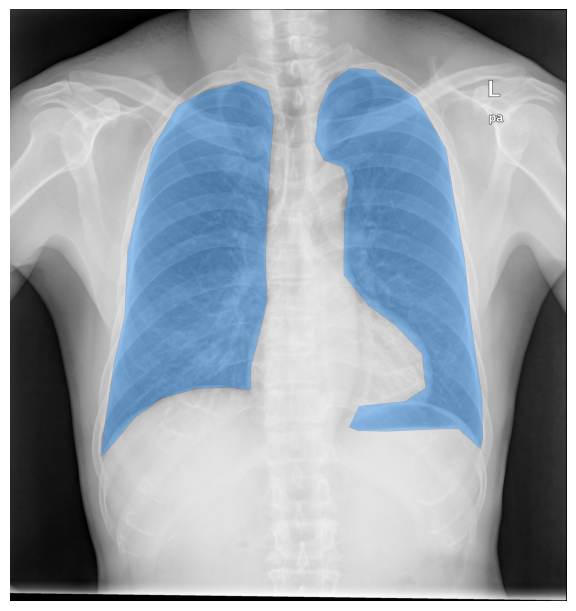

In [62]:
plot_masks(cxr_1, cxr_1_mask)

In [26]:
isic_1 = cv2.imread('/mnt/B-SSD/maltamed/datasets/2D/ISIC/images/ISIC_0009981.jpg', cv2.IMREAD_COLOR)
isic_1_mask = cv2.imread('/mnt/B-SSD/maltamed/datasets/2D/ISIC/mask/ISIC_0009981_segmentation.png', cv2.IMREAD_GRAYSCALE)
isic_2 = cv2.imread('/mnt/B-SSD/maltamed/datasets/2D/ISIC/images/ISIC_0010020.jpg', cv2.IMREAD_COLOR)
isic_2_mask = cv2.imread('/mnt/B-SSD/maltamed/datasets/2D/ISIC/mask/ISIC_0010020_segmentation.png', cv2.IMREAD_GRAYSCALE)
isic_3 = cv2.imread('/mnt/B-SSD/maltamed/datasets/2D/ISIC/images/ISIC_0010024.jpg', cv2.IMREAD_COLOR)
isic_3_mask = cv2.imread('/mnt/B-SSD/maltamed/datasets/2D/ISIC/mask/ISIC_0010024_segmentation.png', cv2.IMREAD_GRAYSCALE)
isic_4 = cv2.imread('/mnt/B-SSD/maltamed/datasets/2D/ISIC/images/ISIC_0010041.jpg', cv2.IMREAD_COLOR)
isic_4_mask = cv2.imread('/mnt/B-SSD/maltamed/datasets/2D/ISIC/mask/ISIC_0010041_segmentation.png', cv2.IMREAD_GRAYSCALE)

255

In [54]:
cxr_1 = cv2.imread('/mnt/B-SSD/maltamed/datasets/2D/CXR_kaggle/images/CHNCXR_0006_0.png', cv2.IMREAD_COLOR)
cxr_1_mask = cv2.imread('/mnt/B-SSD/maltamed/datasets/2D/CXR_kaggle/mask/CHNCXR_0006_0_mask.png', cv2.IMREAD_GRAYSCALE)
cxr_2 = cv2.imread('/mnt/B-SSD/maltamed/datasets/2D/CXR_kaggle/images/CHNCXR_0003_0.png', cv2.IMREAD_COLOR)
cxr_2_mask = cv2.imread('/mnt/B-SSD/maltamed/datasets/2D/CXR_kaggle/mask/CHNCXR_0003_0_mask.png', cv2.IMREAD_GRAYSCALE)